## Requirements

- 1 Matplotlib chart (of any type)
- 1 seaborn chart (of any type)
- <font color=blue>3</font> interactive altair plots

The following techniques should be used at least once:

1. A transformation (mean, count, binning, etc)
2. Brush selection

__*Extra credit:*__ *2-chart dashboard, where filtering of one chart cross-filters the other chart <font color=grey>(via transform_filter())*</font>

- A short discussion (a few sentences) of the main conclusion of each chart (in a markdown cell below each chart). It does not need to be interesting or insightful, but it is good practice to always note the main conclusions so the notebook make sense after time passes.

### First step, let's import all the required packages and databases:

In [25]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import altair as alt
import seaborn as sns
sns.set(style="darkgrid")

### Now we'll use Pandas to import two Stormwater Management databases from OpenDataPhilly:

In [26]:
GSI = pd.read_csv('GSI_Private_Projects_Retrofit.csv')
GSW_Reg = pd.read_csv('GSI_Private_Projects_Regs.csv')
GSW_Reg

,X,Y,OBJECTID,TRACKING,NAME,TRACKINGNUMBER,PROJECTNAME,OVERALLSTATUSCATEGORY,APPROVALDATE,PROGRAM,SURFACE_INFILTRATION_BASIN,SUBSURFACE_INFILTRATION_BASIN,SURFACE_DETENTION_BASIN,SUBSURFACE_DETENTION_BASIN,BIOINFILTRATION,BIORETENTION,CISTERN,GREEN_ROOF,POROUS_PAVEMENT,WQ_TREATMENT_DEVICE
0,-74.975242,40.108441,1,2005-0010-01,Perry Matarazzo Holding LLC,2005-0010-01,Perry Matarazzo Holding LLC,Complete,2005-12-28T00:00:00.000Z,Regulation,0,0,1,0,0,0,0,0,0,0
1,-75.215748,39.961768,2,2005-0052-01,Philadelphia Youth Center,2005-0052-01,Philadelphia Youth Center,Verified,2009-09-28T15:01:07.000Z,Regulation,0,2,0,0,0,0,0,0,0,0
2,-75.023528,40.077345,3,2005-0060-01,Wawa,2005-0060-01,Wawa,Complete,2006-02-06T00:00:00.000Z,Regulation,0,1,0,0,0,0,0,0,0,0
3,-75.239261,39.958060,4,2005-0061-01,William Sayre High School,2005-0061-01,William Sayre High School,Complete,2006-09-25T00:00:00.000Z,Regulation,0,0,0,0,0,0,0,0,1,0
4,-75.227195,39.898372,5,2005-0064-01,7401 Essington Ave,2005-0064-01,Essington Avenue Parking Lot,Verified,2006-05-17T00:00:00.000Z,Regulation,0,0,0,4,0,0,0,0,0,0
5,-75.033770,40.083380,6,2005-0066-01,2000 Grant Ave,2005-0066-01,2000 Grant Ave.,Verified,2007-11-20T00:00:00.000Z,Regulation,0,0,0,1,0,0,0,0,1,0
6,-75.181938,39.967186,7,2005-0013-01,Philadelphia Museum of Art,2005-0013-01,Philadelphia Museum of Art Garage and Sculptur...,Complete,2005-12-20T00:00:00.000Z,Regulation,0,0,0,0,0,0,0,0,0,0
7,-75.221502,39.921080,8,2006-0017-01,Inglis Apartments at Elmwood,2006-0017-01,Inglis Apartments at Elmwood,Verified,2006-10-05T00:00:00.000Z,Regulation,0,1,0,0,0,0,0,0,1,0
8,-75.041980,40.042290,9,2006-0048-01,Abraham Lincoln High School,2006-0048-01,Abraham Lincoln HS,Complete,2007-05-16T00:00:00.000Z,Regulation,1,1,0,0,0,0,0,0,0,0
9,-75.151547,39.964064,10,2006-0057-01,Liberties Station,2006-0057-01,Liberties Station,Verified,2008-04-03T00:00:00.000Z,Regulation,0,0,0,1,0,0,0,0,0,0


#### I'm curious which columns exactly are different... 🤔

In [27]:
print(GSI.columns.values)

['X' 'Y' 'OBJECTID' 'TRACKING' 'NAME' 'TRACKINGNUMBER' 'PROJECTNAME'
 'OVERALLSTATUSCATEGORY' 'APPROVALDATE' 'PROGRAM' 'SMIP' 'GARP'
 'GRANTAMOUNT' 'SURFACE_INFILTRATION_BASIN'
 'SUBSURFACE_INFILTRATION_BASIN' 'SURFACE_DETENTION_BASIN'
 'SUBSURFACE_DETENTION_BASIN' 'BIOINFILTRATION' 'BIORETENTION' 'CISTERN'
 'GREEN_ROOF' 'POROUS_PAVEMENT' 'WQ_TREATMENT_DEVICE']


In [28]:
print(GSW_Reg.columns.values)

['X' 'Y' 'OBJECTID' 'TRACKING' 'NAME' 'TRACKINGNUMBER' 'PROJECTNAME'
 'OVERALLSTATUSCATEGORY' 'APPROVALDATE' 'PROGRAM'
 'SURFACE_INFILTRATION_BASIN' 'SUBSURFACE_INFILTRATION_BASIN'
 'SURFACE_DETENTION_BASIN' 'SUBSURFACE_DETENTION_BASIN' 'BIOINFILTRATION'
 'BIORETENTION' 'CISTERN' 'GREEN_ROOF' 'POROUS_PAVEMENT'
 'WQ_TREATMENT_DEVICE']


In [29]:
len(GSW_Reg.columns)

20

In [30]:
len(GSI.columns)

23

In [31]:
GSI.GRANTAMOUNT.isnull().sum()

41

In [32]:
len(GSI)

154

#### Grant Amount looks interesting but there aren't enough values to do an analysis with. Let's just join the data.

In [33]:
vertical_stack = pd.concat([GSI, GSW_Reg], axis=0,sort='none')

vertical_stack


,APPROVALDATE,BIOINFILTRATION,BIORETENTION,CISTERN,GARP,GRANTAMOUNT,GREEN_ROOF,NAME,OBJECTID,OVERALLSTATUSCATEGORY,...,SMIP,SUBSURFACE_DETENTION_BASIN,SUBSURFACE_INFILTRATION_BASIN,SURFACE_DETENTION_BASIN,SURFACE_INFILTRATION_BASIN,TRACKING,TRACKINGNUMBER,WQ_TREATMENT_DEVICE,X,Y
0,2011-09-05T00:00:00.000Z,0,0,0,0.0,NaN,0,Weavers Way Coop,1,Verified,...,NaN,0,1,0,0,2009-WEAV-1224-01,2009-WEAV-1224-01,0,-75.205764,40.075413
1,2010-10-01T11:39:06.000Z,0,0,0,0.0,NaN,0,CATCH Retrofit,2,Verified,...,NaN,0,2,0,0,2010-CATC-1352-01,2010-CATC-1352-01,0,-75.188765,39.908700
2,2010-09-30T16:50:06.000Z,1,0,0,0.0,NaN,0,Pennypack Woods Retrofit,3,Verified,...,0.0,0,0,0,0,2010-PENN-1369-01,2010-PENN-1369-01,0,-75.014559,40.051052
3,2013-10-16T10:25:28.000Z,0,0,0,0.0,NaN,1,Community Legal Services,4,Verified,...,NaN,0,0,0,0,2010-COMM-1370-01,2010-COMM-1370-01,0,-75.151994,40.009141
4,2011-03-21T15:20:13.000Z,0,0,0,0.0,NaN,0,TVPV Stormwater Credit App.,5,Verified,...,NaN,0,0,2,0,2011-TVPV-1489-01,2011-TVPV-1489-01,0,-75.073866,40.085385
5,2011-06-23T13:56:40.000Z,0,0,0,0.0,NaN,0,2800 Black Lake Pl,6,Verified,...,NaN,0,0,0,2,2011-2800-1510-01,2011-2800-1510-01,0,-74.983445,40.109533
6,2015-02-04T00:00:00.000Z,0,0,0,0.0,NaN,0,1518 Cambridge Street to 1521 Poplar Street,7,Verified,...,NaN,0,1,0,0,2011-1518-1561-01,2011-1518-1561-01,0,-75.162226,39.970834
7,2011-06-13T14:28:24.000Z,0,0,0,0.0,NaN,0,Lafayette Redeemer Stormwater Retrofit,8,Verified,...,NaN,0,0,2,0,2011-LAFA-1565-01,2011-LAFA-1565-01,0,-75.065830,40.083729
8,2012-01-12T14:30:44.000Z,0,0,0,0.0,NaN,0,2150 E Westmoreland St,9,Verified,...,NaN,0,1,0,0,2011-2150-1616-01,2011-2150-1616-01,0,-75.107078,39.992711
9,2011-07-12T00:00:00.000Z,0,0,0,0.0,NaN,0,St James Episcopal Church Retrofit,10,Verified,...,NaN,0,0,0,0,2011-RETR-001-01,2011-RETR-001-01,0,-75.238950,39.921621


### This Approval column value isn't easy to read at first glance. Let's fix it.

In [34]:
df = vertical_stack
df['Approval_Time'] = df['APPROVALDATE'].str[11:16]
df['APPROVALDATE'] = df['APPROVALDATE'].str[:10]
df

,APPROVALDATE,BIOINFILTRATION,BIORETENTION,CISTERN,GARP,GRANTAMOUNT,GREEN_ROOF,NAME,OBJECTID,OVERALLSTATUSCATEGORY,...,SUBSURFACE_DETENTION_BASIN,SUBSURFACE_INFILTRATION_BASIN,SURFACE_DETENTION_BASIN,SURFACE_INFILTRATION_BASIN,TRACKING,TRACKINGNUMBER,WQ_TREATMENT_DEVICE,X,Y,Approval_Time
0,2011-09-05,0,0,0,0.0,NaN,0,Weavers Way Coop,1,Verified,...,0,1,0,0,2009-WEAV-1224-01,2009-WEAV-1224-01,0,-75.205764,40.075413,00:00
1,2010-10-01,0,0,0,0.0,NaN,0,CATCH Retrofit,2,Verified,...,0,2,0,0,2010-CATC-1352-01,2010-CATC-1352-01,0,-75.188765,39.908700,11:39
2,2010-09-30,1,0,0,0.0,NaN,0,Pennypack Woods Retrofit,3,Verified,...,0,0,0,0,2010-PENN-1369-01,2010-PENN-1369-01,0,-75.014559,40.051052,16:50
3,2013-10-16,0,0,0,0.0,NaN,1,Community Legal Services,4,Verified,...,0,0,0,0,2010-COMM-1370-01,2010-COMM-1370-01,0,-75.151994,40.009141,10:25
4,2011-03-21,0,0,0,0.0,NaN,0,TVPV Stormwater Credit App.,5,Verified,...,0,0,2,0,2011-TVPV-1489-01,2011-TVPV-1489-01,0,-75.073866,40.085385,15:20
5,2011-06-23,0,0,0,0.0,NaN,0,2800 Black Lake Pl,6,Verified,...,0,0,0,2,2011-2800-1510-01,2011-2800-1510-01,0,-74.983445,40.109533,13:56
6,2015-02-04,0,0,0,0.0,NaN,0,1518 Cambridge Street to 1521 Poplar Street,7,Verified,...,0,1,0,0,2011-1518-1561-01,2011-1518-1561-01,0,-75.162226,39.970834,00:00
7,2011-06-13,0,0,0,0.0,NaN,0,Lafayette Redeemer Stormwater Retrofit,8,Verified,...,0,0,2,0,2011-LAFA-1565-01,2011-LAFA-1565-01,0,-75.065830,40.083729,14:28
8,2012-01-12,0,0,0,0.0,NaN,0,2150 E Westmoreland St,9,Verified,...,0,1,0,0,2011-2150-1616-01,2011-2150-1616-01,0,-75.107078,39.992711,14:30
9,2011-07-12,0,0,0,0.0,NaN,0,St James Episcopal Church Retrofit,10,Verified,...,0,0,0,0,2011-RETR-001-01,2011-RETR-001-01,0,-75.238950,39.921621,00:00


### We can get rid of the unimportant columns

In [35]:
#subset important variables 
df2 = df.drop(['GRANTAMOUNT', 'OBJECTID','TRACKING','TRACKINGNUMBER', 'SMIP','GARP'], axis=1)

### There are a lot of projects. Let's group them.. for analysis.

In [36]:
projects = df2[['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
       'GREEN_ROOF', 'POROUS_PAVEMENT', 'SUBSURFACE_DETENTION_BASIN',
       'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
       'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE']]

#add a new column for the total projects

projects['Totals'] = ''
#projects['Projects'] =''
projects2 = projects
# pd.melt?
projects2 = pd.melt(projects2, id_vars=[('Totals')], value_vars=['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
        'GREEN_ROOF', 'POROUS_PAVEMENT', 'SUBSURFACE_DETENTION_BASIN',
        'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
        'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE'],var_name='projects', value_name='Project_Counts')

# pd.melt(projects).groupby(id_vars=[('A', 'D')],['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
#        'GREEN_ROOF', 'POROUS_PAVEMENT', 'SUBSURFACE_DETENTION_BASIN',
#        'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
#        'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE'])['Count'].sum().reset_index()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
projects2

,Totals,projects,Project_Counts
0,,BIOINFILTRATION,0
1,,BIOINFILTRATION,0
2,,BIOINFILTRATION,1
3,,BIOINFILTRATION,0
4,,BIOINFILTRATION,0
5,,BIOINFILTRATION,0
6,,BIOINFILTRATION,0
7,,BIOINFILTRATION,0
8,,BIOINFILTRATION,0
9,,BIOINFILTRATION,0


### Looks good but we can summarize them and visualize this

In [38]:
projects2 = projects2.groupby('projects').sum()[['Project_Counts']]
projects2

,Project_Counts
projects,
BIOINFILTRATION,317
BIORETENTION,481
CISTERN,26
GREEN_ROOF,345
POROUS_PAVEMENT,556
SUBSURFACE_DETENTION_BASIN,546
SUBSURFACE_INFILTRATION_BASIN,1002
SURFACE_DETENTION_BASIN,133
SURFACE_INFILTRATION_BASIN,173


#### Quickly want to format the Project Categories so they show nicely on chart labels.

In [39]:
projects3 = projects2
projects3 = projects3.reset_index()
projects3['projects'] = projects3['projects'].str.replace('_', ' ')
projects3['projects'] = projects3['projects'].apply(lambda x: x.title())
projects3

,projects,Project_Counts
0,Bioinfiltration,317
1,Bioretention,481
2,Cistern,26
3,Green Roof,345
4,Porous Pavement,556
5,Subsurface Detention Basin,546
6,Subsurface Infiltration Basin,1002
7,Surface Detention Basin,133
8,Surface Infiltration Basin,173
9,Wq Treatment Device,136


## Let's plot this as a lolipop chart

(0, 1030)

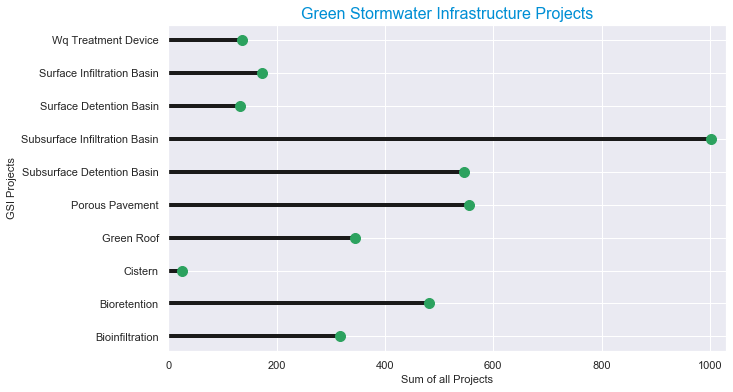

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Green Stormwater Infrastructure Projects', color='C0',size=16)

plt.style.use('fivethirtyeight')

ax.hlines(projects3.projects, xmin=0, xmax=projects3['Project_Counts'])
ax.plot(projects3['Project_Counts'], projects3.projects, "o",markersize=10, color='#2ca25f',linewidth=15)


ax.set_ylabel('GSI Projects',fontsize=11)
ax.set_xlabel('Sum of all Projects',fontsize=11)                  
                  

ax.set_xlim(0, 1030)

### Pretty cool. [Subsurface Infiltration Basins](https://www.pwdplanreview.org/manual/chapter-4/4.4-subsurface-infiltration/) were the highest number of projects completed.

### Let's try plotting in Seaborn
#### Seaborn Plot
1. Most common type of project as a double bar chart by <font color='teal'>type of program (hue)</font>

#### First need to include the programs and get the individual counts again to show the totals by each program type.

In [41]:
df3 = df2[['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
       'GREEN_ROOF',  'POROUS_PAVEMENT',
       'PROGRAM', 'SUBSURFACE_DETENTION_BASIN',
       'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
       'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE', 
       'Approval_Time']]

df4 = pd.melt(df3, id_vars=[('PROGRAM')], value_vars=['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
        'GREEN_ROOF', 'POROUS_PAVEMENT', 'SUBSURFACE_DETENTION_BASIN',
        'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
        'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE'],var_name='projects', value_name='Project_Counts')
df4['projects'] = df4['projects'].str.replace('_', ' ')
df4['projects'] = df4['projects'].apply(lambda x: x.title())
df4=df4.sort_values('Project_Counts', ascending=False)
df4



,PROGRAM,projects,Project_Counts
10408,Regulation,Surface Infiltration Basin,100
7998,Regulation,Subsurface Infiltration Basin,88
6327,Regulation,Subsurface Detention Basin,54
5100,Regulation,Porous Pavement,48
7510,Regulation,Subsurface Infiltration Basin,48
820,Regulation,Bioinfiltration,35
1725,Regulation,Bioretention,31
2002,Regulation,Bioretention,27
4205,Regulation,Green Roof,23
7508,Regulation,Subsurface Infiltration Basin,22


### Now we can plot in Seaborn.

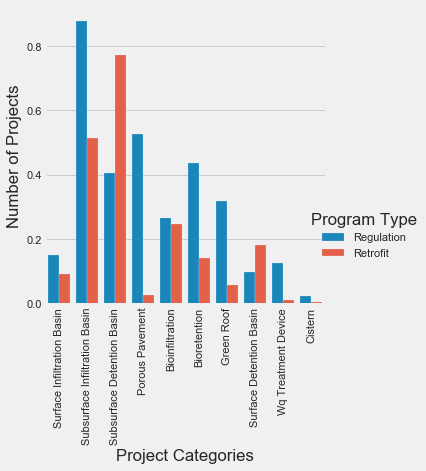

In [42]:
chrt= sns.catplot(x='projects',y='Project_Counts',hue='PROGRAM',linewidth=0.2,kind='bar',ci=None,data=df4)
chrt.set_xticklabels(rotation=90)
chrt.set(xlabel='Project Categories', ylabel='Number of Projects')
chrt._legend.set_title('Program Type')

## Finally, let's make 3 Altair charts.  

###  Here's what I'd like to show.
1. Distribution of Approval Dates on for all projects by year 
2. Top 10 companies with most respective projects 
3. The individual projects across time using the brush technique

In [43]:
#need dependencies to render charts 
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

### Let's reorganize the original dataset


In [44]:
df5 = vertical_stack[['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
       'GREEN_ROOF',  'POROUS_PAVEMENT',
       'PROGRAM', 'SUBSURFACE_DETENTION_BASIN',
       'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
       'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE', 
       'APPROVALDATE']]

df6 = pd.melt(df5, id_vars=[('APPROVALDATE')], value_vars=['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
        'GREEN_ROOF', 'POROUS_PAVEMENT', 'SUBSURFACE_DETENTION_BASIN',
        'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
        'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE'],var_name='projects', value_name='Project_Counts')
df6['projects'] = df6['projects'].str.replace('_', ' ')
df6['projects'] = df6['projects'].apply(lambda x: x.title())
#df6=df6.sort_values('APPROVALDATE', ascending=False)
df6

,APPROVALDATE,projects,Project_Counts
0,2011-09-05,Bioinfiltration,0
1,2010-10-01,Bioinfiltration,0
2,2010-09-30,Bioinfiltration,1
3,2013-10-16,Bioinfiltration,0
4,2011-03-21,Bioinfiltration,0
5,2011-06-23,Bioinfiltration,0
6,2015-02-04,Bioinfiltration,0
7,2011-06-13,Bioinfiltration,0
8,2012-01-12,Bioinfiltration,0
9,2011-07-12,Bioinfiltration,0


### Let's plot the individual projects types to get a sense of how they trend over time

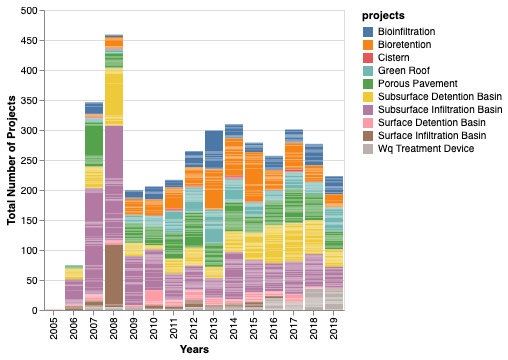

In [45]:

alt.Chart(df6).mark_bar().encode(x=alt.X("APPROVALDATE:O",timeUnit="year", sort='ascending', axis=alt.Axis(title='Years')),y=alt.Y('sum(Project_Counts)',axis=alt.Axis(title='Total Number of Projects')),color='projects',tooltip=['projects:N', 'APPROVALDATE:T', 'sum(Project_Counts):Q']).transform_filter(alt.datum['Project_Counts'] > 0).interactive()


## Let's Make a data frame with project categories, names, X,Y and Time


In [46]:
#make a data frame with project categories, names, xy and time
CNXYT_DF = df2[['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
       'GREEN_ROOF',  'POROUS_PAVEMENT',
       'PROGRAM', 'SUBSURFACE_DETENTION_BASIN',
       'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
       'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE', 
       'APPROVALDATE','NAME','X','Y','OVERALLSTATUSCATEGORY']] 

CNXYT_DF2 = pd.melt(CNXYT_DF, id_vars=['PROGRAM','NAME','X','Y','APPROVALDATE','OVERALLSTATUSCATEGORY'], value_vars=['BIOINFILTRATION', 'BIORETENTION', 'CISTERN',
         'GREEN_ROOF', 'POROUS_PAVEMENT', 'SUBSURFACE_DETENTION_BASIN',
         'SUBSURFACE_INFILTRATION_BASIN', 'SURFACE_DETENTION_BASIN',
         'SURFACE_INFILTRATION_BASIN', 'WQ_TREATMENT_DEVICE'],var_name='projects', value_name='Project_Counts')


CNXYT_DF2

,PROGRAM,NAME,X,Y,APPROVALDATE,OVERALLSTATUSCATEGORY,projects,Project_Counts
0,Retrofit,Weavers Way Coop,-75.205764,40.075413,2011-09-05,Verified,BIOINFILTRATION,0
1,Retrofit,CATCH Retrofit,-75.188765,39.908700,2010-10-01,Verified,BIOINFILTRATION,0
2,Retrofit,Pennypack Woods Retrofit,-75.014559,40.051052,2010-09-30,Verified,BIOINFILTRATION,1
3,Retrofit,Community Legal Services,-75.151994,40.009141,2013-10-16,Verified,BIOINFILTRATION,0
4,Retrofit,TVPV Stormwater Credit App.,-75.073866,40.085385,2011-03-21,Verified,BIOINFILTRATION,0
5,Retrofit,2800 Black Lake Pl,-74.983445,40.109533,2011-06-23,Verified,BIOINFILTRATION,0
6,Retrofit,1518 Cambridge Street to 1521 Poplar Street,-75.162226,39.970834,2015-02-04,Verified,BIOINFILTRATION,0
7,Retrofit,Lafayette Redeemer Stormwater Retrofit,-75.065830,40.083729,2011-06-13,Verified,BIOINFILTRATION,0
8,Retrofit,2150 E Westmoreland St,-75.107078,39.992711,2012-01-12,Verified,BIOINFILTRATION,0
9,Retrofit,St James Episcopal Church Retrofit,-75.238950,39.921621,2011-07-12,Verified,BIOINFILTRATION,0


###  Which Organizations have the highest respective number of projects 

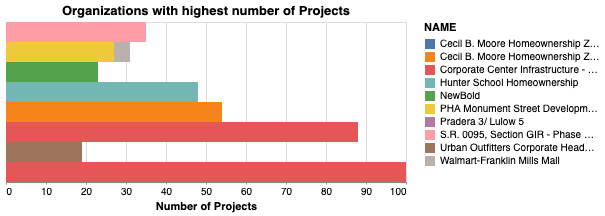

In [47]:
alt.Chart(CNXYT_DF2).mark_rect().encode(
    alt.X('Project_Counts:Q', stack='center',
        axis=alt.Axis(title='Number of Projects', tickSize=2)
    ),
    alt.Y('projects:N',axis=None),
      alt.Color('NAME:N',
        scale=alt.Scale(scheme='tableau10')
    ),tooltip=['Project_Counts:Q','NAME:N']
).properties(title='Organizations with highest number of Projects').transform_filter(alt.datum.Project_Counts > 16).interactive()



## Final Plot- Individual Projects over time

 My first instinct was to plot the individual projects over time as counts. __However__, in reality while some organizations did have a lot of projects, most organizations receiving grants for <font color='green'>Green Stormwater Infrastructure</font> have only a few. So there were a lot of points clustered at the bottom along the X axis. Let's look:

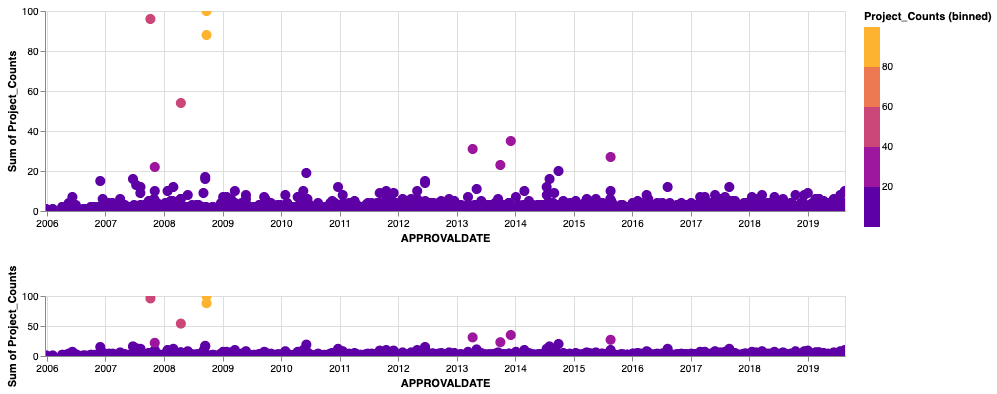

In [48]:
interval = alt.selection_interval(encodings=['x'])
## totals over the years
big_chart =alt.Chart(df6).mark_line(point=True).encode(x=alt.X("APPROVALDATE:T", timeUnit="year", axis=alt.Axis()), y="sum(Project_Counts):Q", tooltip=['sum(Project_Counts):Q'],
).interactive()

small_chart = alt.Chart(CNXYT_DF2).mark_circle(size=100).encode(alt.X('APPROVALDATE:T',timeUnit='datemonth'),alt.Y('sum(Project_Counts):Q'),alt.X2('OVERALLSTATUSCATEGORY:N'),tooltip=['Project_Counts','OVERALLSTATUSCATEGORY'],shape='OVERALLSTATUSCATEGORY',color=alt.Color('Project_Counts:Q',bin=True,scale=alt.Scale(scheme='plasma'))) 

chart = small_chart.properties(
    width=800,
    height=200
).encode(
    x=alt.X('APPROVALDATE:T',scale=alt.Scale(domain=interval.ref()))
)

view = chart.properties(
    width=800,
    height=60,
    selection=interval
)
chart & view
